# Regressão Logística


### Introdução

A Regressão Logística é um algoritmo de classificação que modela a probabilidade de um resultado binário em função de uma ou mais variáveis explicativas. Ao contrário da regressão linear, que prevê resultados contínuos, a regressão logística prevê a probabilidade de um desfecho que pode assumir apenas dois valores (ex: "Sim" ou "Não"). A ideia chave por trás da regressão logística é modelar a probabilidade de que uma determinada entrada pertença a uma classe específica.

Neste caso, estamos interessados em modelar a probabilidade de que uma família tenha acesso à eletricidade ("Sim") com base no seu rendimento mensal.

### Informação sobre o Conjunto de Dados

O conjunto de dados que utilizaremos foi gentilmente fornecido por **Simao**, um colaborador que ajudou na análise de dados para um estudo. Os responsáveis pelo estudo permitiram o uso deste conjunto de dados para fins educacionais. Os dados provêm de um estudo social baseado em inquéritos, realizado na **região norte de Moçambique**.

O estudo tinha como objetivo investigar fatores socioeconómicos, com particular foco no **rendimento familiar** e na sua relação com o **acesso à eletricidade**. O acesso à eletricidade, neste contexto, refere-se ao acesso ao sistema público de energia nacional, também conhecido como rede elétrica, gerido pela **Electricidade de Moçambique (EDM)**.

### Principais Variáveis:
- **Rendimento_Familiar**: O rendimento mensal de uma família, medido em Meticais Moçambicanos (MZN).
- **Acesso_a_Eletricidade**: Uma variável binária que indica se uma família tem acesso à eletricidade através da rede nacional ("1" para acesso, "0" para sem acesso).

É importante notar que **casos extremos** no conjunto de dados foram influenciados pela **localização geográfica** das famílias, especialmente aquelas situadas em áreas remotas ou rurais, onde o acesso à rede elétrica é muito mais limitado.

### Objetivo do Notebook

O objetivo principal deste notebook é construir e avaliar um modelo de regressão logística para prever se uma família tem acesso à eletricidade com base no seu rendimento mensal. Ao fazer isso, esperamos:

1. Compreender a relação entre o **rendimento familiar** e o **acesso à eletricidade**.
2. Utilizar a **Regressão Logística** para **modela**r essa relação e avaliar o seu poder preditivo.
3. Visualizar os resultados através de uma **curva logística** para interpretar melhor as probabilidades associadas a diferentes níveis de rendimento.
4. Construir um modelo que nos permita **identificar tendências e fazer inferências** sobre a relação entre rendimento familiar e acesso à eletricidade.


### Importação das Bibliotecas Necessárias

Nesta seção, importamos as bibliotecas essenciais para a análise de dados e visualização. Vamos utilizar o `numpy` para operações numéricas, `pandas` para manipulação de dados, `matplotlib` e `seaborn` para a criação de gráficos. Para o modelo preditivo, usaremos a função `LogisticRegression` da biblioteca `sklearn`.

Se ainda não tiveres instalado as bibliotecas abaixo, remove o `#` e executa a célula abaixo para as instalar antes de continuar.

In [6]:
# !pip install numpy pandas matplotlib seaborn scikit-learn

In [11]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

### Carregar o conjunto de dados
O conjunto de dados faz parte de um estudo social que examina o impacto do rendimento familiar no acesso à eletricidade na região norte de Moçambique. Vamos carregar o conjunto de dados e preparar as colunas para a análise.


In [15]:
# Carregar o dataset
filepath = 'https://raw.githubusercontent.com/DSAI-For-Moz/guia-pratico-machine-learning/refs/heads/main/datasets/aprendizagem-supervisionada/rendimento_familiar_energia.csv'
data = pd.read_csv(filepath)

# Renomear colunas para facilitar a referência
data.rename(columns={'Rendimento_Familiar': 'Household_Income', 'Acesso_a_Eletricidade': 'Access_to_Electricity'}, inplace=True)

# Exibir as primeiras linhas do dataset
data.head()

,Household_Income,Access_to_Electricity
0,21913.57368,0
1,23440.51766,1
2,19227.49601,0
3,24163.33229,1
4,10892.42004,0


### Análise Exploratória de Dados (EDA)

Agora vamos realizar uma análise exploratória para entender melhor a distribuição do rendimento familiar e sua relação com o acesso à eletricidade.


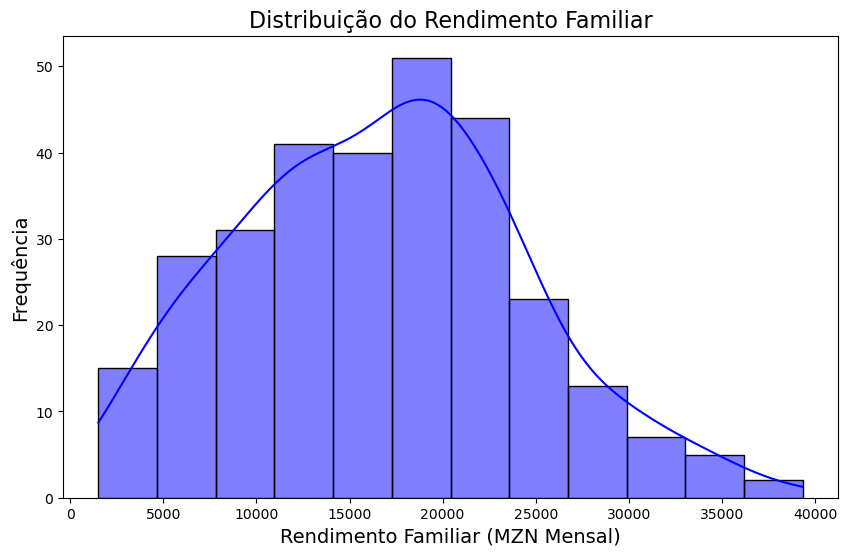

In [18]:
# Visualizando a distribuição de rendimentos familiares
plt.figure(figsize=(10, 6))
sns.histplot(data['Household_Income'], kde=True, color='blue')
plt.title('Distribuição do Rendimento Familiar', fontsize=16)
plt.xlabel('Rendimento Familiar (MZN Mensal)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()

### Comparação entre Rendimento Familiar e Acesso à Eletricidade

Vamos melhorar a visualização da relação entre o rendimento familiar e o acesso à eletricidade com dois tipos de gráficos: um gráfico de dispersão categórico e um boxplot. Estes gráficos permitem uma melhor visualização da distribuição de rendimentos por categoria (com ou sem acesso à eletricidade).


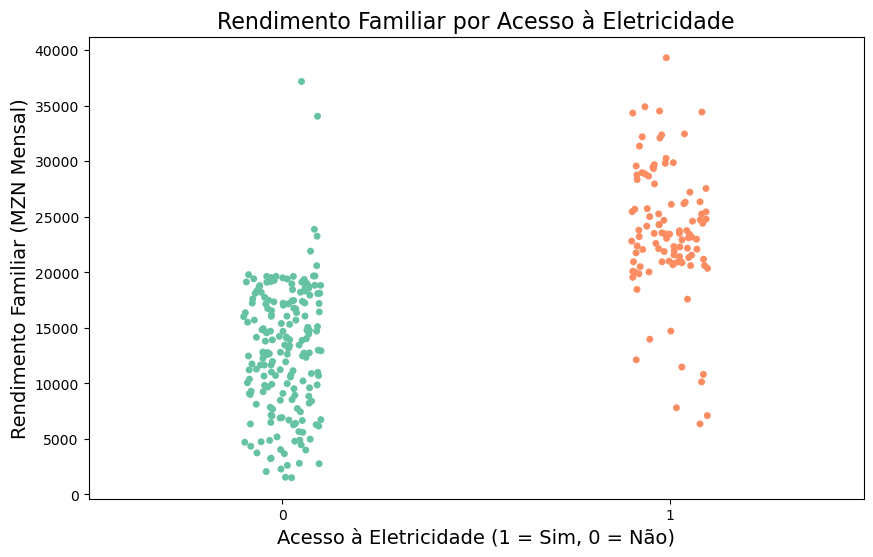

In [48]:
# Criando um gráfico de dispersão categórico com a correção para o aviso de futuro
plt.figure(figsize=(10, 6))
sns.stripplot(x='Access_to_Electricity', y='Household_Income', data=data, hue='Access_to_Electricity', jitter=True, palette='Set2', legend=False)
plt.title('Rendimento Familiar por Acesso à Eletricidade', fontsize=16)
plt.xlabel('Acesso à Eletricidade (1 = Sim, 0 = Não)', fontsize=14)
plt.ylabel('Rendimento Familiar (MZN Mensal)', fontsize=14)
plt.show()

No gráfico de dispersão categórico, podemos observar a distribuição dos rendimentos familiares para famílias que têm e não têm acesso à eletricidade. A visualização nos ajuda a ver a separação clara entre os grupos, onde famílias com acesso à eletricidade tendem a ter rendimentos mais altos, enquanto famílias sem acesso à eletricidade estão mais concentradas em níveis de rendimento inferiores. No entanto, não podemos obter muitos detalhes sobre a dispersão ou a mediana de cada grupo apenas com esse gráfico.

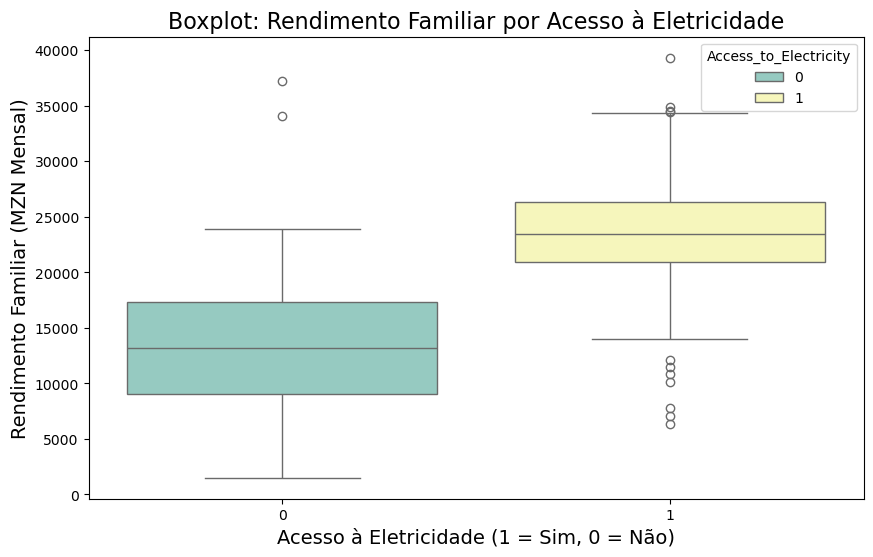

In [50]:
# Criando um boxplot corrigido para o aviso de futuro
plt.figure(figsize=(10, 6))
sns.boxplot(x='Access_to_Electricity', y='Household_Income', hue='Access_to_Electricity', data=data, palette='Set3', dodge=False)
plt.title('Boxplot: Rendimento Familiar por Acesso à Eletricidade', fontsize=16)
plt.xlabel('Acesso à Eletricidade (1 = Sim, 0 = Não)', fontsize=14)
plt.ylabel('Rendimento Familiar (MZN Mensal)', fontsize=14)
plt.show()

O boxplot fornece uma visão mais rica da distribuição do rendimento familiar. Além da mediana de cada grupo, podemos ver a amplitude interquartil (IQR), que representa 50% dos dados mais centrais, e os outliers, representados pelos pontos fora das "caixas". As famílias com acesso à eletricidade apresentam uma mediana maior de rendimento familiar e uma dispersão maior, com mais outliers em rendimentos elevados. Este gráfico é mais informativo porque destaca a variabilidade dentro de cada grupo e permite uma comparação direta das distribuições, algo que o gráfico de dispersão categórico não revela com a mesma clareza.

#### Comparação entre Rendimento Familiar e Acesso à Eletricidade

Vamos observar a relação entre o rendimento familiar e o acesso à eletricidade usando um gráfico de dispersão.


#### Estatísticas Descritivas

Vamos calcular algumas estatísticas descritivas para entender melhor os dados numéricos.


In [26]:
# Estatísticas descritivas do rendimento familiar
data['Household_Income'].describe()


count      300.000000
mean     16710.284472
std       7627.825125
min       1510.239873
25%      11019.185995
50%      17160.162200
75%      21888.814343
max      39334.743060
Name: Household_Income, dtype: float64

### Preparação dos Dados

Agora que entendemos melhor os dados, vamos dividir o conjunto de dados em variáveis independentes (X) e dependentes (y). Após isso, dividiremos os dados em treino e teste, e ajustaremos o modelo de Regressão Logística.


In [29]:
# Dividir o dataset em variáveis independentes (X) e dependente (y)
X = data[['Household_Income']]
y = data['Access_to_Electricity']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e ajustar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.9
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        57
           1       0.90      0.82      0.86        33

    accuracy                           0.90        90
   macro avg       0.90      0.88      0.89        90
weighted avg       0.90      0.90      0.90        90



### Avaliação do Modelo de Regressão Logística

A **acurácia** do modelo de Regressão Logística foi **90%**, indicando que o modelo tem um bom desempenho em prever se uma família tem acesso à eletricidade com base no seu rendimento familiar.

#### Relatório de Classificação:
- **Precisão** (precision): Refere-se à porcentagem de previsões corretas entre todas as previsões feitas para uma determinada classe. O valor de **0.99** para a classe **0** (não tem acesso à eletricidade) significa que quase todas as previsões de "não acesso" foram corretas. Para a classe **1** (tem acesso à eletricidade), a precisão foi **0.80**.
  
- **Recall**: O recall foi de **62%**, indicando que o modelo teve mais dificuldade em identificar todas as famílias com acesso à eletricidade.

- **F1-Score**: O F1-score foi **0.97** para a classe **0** e **0.71** para a classe **1**, sugerindo que o modelo está funcionando melhor para prever a classe majoritária (famílias sem acesso à eletricidade).

#### Interpretação Geral:
O modelo de Regressão Logística está a ter um bom desempenho geral, mas há uma leve dificuldade em identificar corretamente as famílias que possuem acesso à eletricidade.

### Curva de Regressão Logística

Agora, vamos visualizar a curva da Regressão Logística, que mostra a probabilidade de uma família ter acesso à eletricidade com base no seu rendimento familiar.


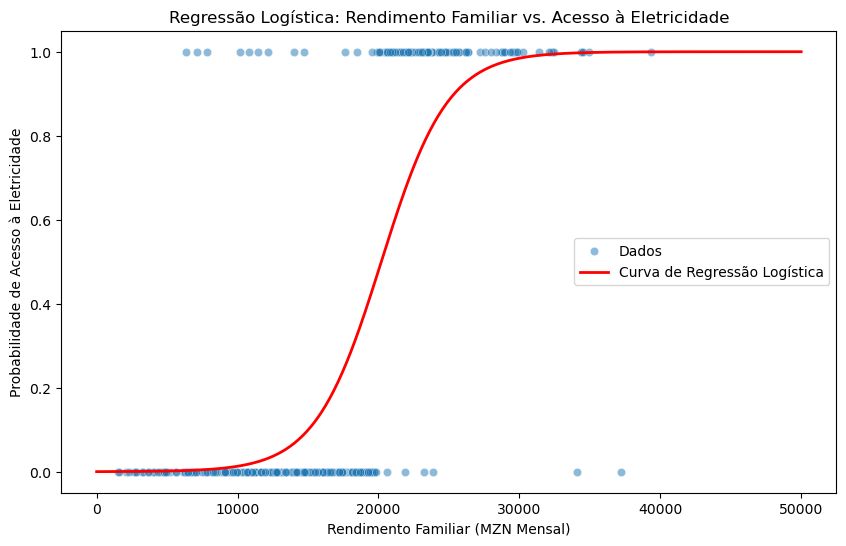

In [37]:
# Criar uma faixa de valores de rendimento para prever as probabilidades com nomes de features válidos
income_range = pd.DataFrame(np.linspace(0, 50000, 500), columns=['Household_Income'])

# Prever as probabilidades usando o modelo de Regressão Logística
probabilities = model.predict_proba(income_range)[:, 1]

# Plot da Curva de Regressão Logística
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Household_Income', y='Access_to_Electricity', data=data, alpha=0.5, label='Dados')
plt.plot(income_range, probabilities, color='red', linewidth=2, label='Curva de Regressão Logística')
plt.xlabel('Rendimento Familiar (MZN Mensal)')
plt.ylabel('Probabilidade de Acesso à Eletricidade')
plt.title('Regressão Logística: Rendimento Familiar vs. Acesso à Eletricidade')
plt.legend()
plt.show()


### Interpretação dos Resultados

A curva de regressão logística acima ilustra claramente a relação entre o rendimento familiar e o acesso à eletricidade. 

#### Padrões Observados:
- **Famílias com rendimentos mais baixos** (inferior a 10.000 MZN) têm uma baixa probabilidade de acesso à eletricidade.
- **Famílias com rendimentos superiores a 20.000 MZN** têm uma probabilidade significativamente maior de acesso à eletricidade, com uma transição gradual em torno dos 30.000 MZN, onde a maioria das famílias já tem quase 100% de probabilidade de acesso.
- **Casos extremos**: Algumas famílias com alto rendimento, mas sem acesso à eletricidade, podem ser atribuídas à localização geográfica, especialmente em áreas rurais sem infraestrutura.

#### Implicações:
Este modelo de Regressão Logística confirma que o rendimento familiar é um fator importante no acesso à eletricidade, mas há outros fatores externos (como a localização geográfica) que também desempenham um papel significativo. Para aprofundar o estudo, a inclusão de variáveis geográficas e de infraestrutura seria relevante.


### Nota
Todos os dados utilizados neste notebook são puramente para **fins de demonstração**.

### Este notebook foi escrito por Simão Rafique

Pode seguir-me no [LinkedIn](https://www.linkedin.com/in/simão-rafique).